In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('HWAssignment_Dataset.csv')

### Data Selection

In [4]:
dfK8Math = df.loc[df['Student_Grade_Level'].isin(['03','04', '05', '07', '06', '08']) &  (df['AssessmentSubject'] == 'Math')]
"Sample size:",dfK8Math.shape[0]

('Sample size:', 14662)

In [5]:
dfK8Math2016_12017 = dfK8Math.loc[dfK8Math['SchoolYear'] == '2016-2017']
dfK8Math2016_12017.shape

(7181, 14)

In [6]:
dfK8Math2017_12018 = dfK8Math.loc[dfK8Math['SchoolYear'] == '2017-2018']
dfK8Math2017_12018.shape

(7481, 14)

The population has grown by 300 students.  It may be usefull to see if the change of students body is effecting scores
rather than a changes in the schools. This would be whats called a confounding factor if its effect is significant. If so its effect needs to be mitigated.

### Basic Statistics on Scores

In [7]:
dfK8Math2016_12017.groupby(['Student_Grade_Level'])['PercentScore','ProficiencyLevelScore'].agg(['count','mean','var'])

PercentScore                     ProficiencyLevelScore  \
                           count      mean       var                 count   
Student_Grade_Level                                                          
03                          1356  0.499713  0.038263                  1356   
04                          1377  0.416901  0.046130                  1377   
05                          1336  0.421310  0.034310                  1336   
06                          1125  0.339545  0.042903                  1125   
07                           947  0.418118  0.043336                   947   
08                          1040  0.408762  0.049784                  1040   

                                         
                         mean       var  
Student_Grade_Level                      
03                   2.269174  0.881735  
04                   2.124183  0.861748  
05                   1.942365  0.911282  
06                   1.726222  0.798645  
07                   1.984161  0.886641  
08                   1.925962  1.021462

In [8]:
dfK8Math2017_12018.groupby(['Student_Grade_Level'])['PercentScore','ProficiencyLevelScore'].agg(['count','mean','var'])

PercentScore                     ProficiencyLevelScore  \
                           count      mean       var                 count   
Student_Grade_Level                                                          
03                          1342  0.541145  0.037298                  1342   
04                          1361  0.448860  0.045164                  1361   
05                          1376  0.443008  0.041725                  1376   
06                          1241  0.407608  0.053456                  1241   
07                          1130  0.434807  0.048534                  1130   
08                          1031  0.426379  0.054893                  1031   

                                         
                         mean       var  
Student_Grade_Level                      
03                   2.458271  0.855454  
04                   2.268185  0.933171  
05                   2.063953  1.063543  
06                   2.125705  0.871282  
07                   2.017699  1.030687  
08                   2.021339  1.151001

In [9]:
dfscores2017_2018 = dfK8Math2017_12018.groupby(['Student_Grade_Level'])['PercentScore'].agg(['count','mean','var'])
mu3_2017_2018, var3_2017_2018 = dfscores2017_2018[['mean','var']].loc['03']
mu4_2017_2018, var4_2017_2018 = dfscores2017_2018[['mean','var']].loc['04']
mu5_2017_2018, var5_2017_2018 = dfscores2017_2018[['mean','var']].loc['05']
mu6_2017_2018, var6_2017_2018 = dfscores2017_2018[['mean','var']].loc['06']
mu7_2017_2018, var7_2017_2018 = dfscores2017_2018[['mean','var']].loc['07']
mu8_2017_2018, var8_2017_2018 = dfscores2017_2018[['mean','var']].loc['08']

In [10]:
mu3_2017_2018, var3_2017_2018

(0.5411450819672141, 0.037298436541790436)

In [11]:
dfscores2016_2017 = dfK8Math2016_12017.groupby(['Student_Grade_Level'])['PercentScore'].agg(['count','mean','var'])
mu3_2016_2017, var3_2016_2017 = dfscores2016_2017[['mean','var']].loc['03']
mu4_2016_2017, var4_2016_2017 = dfscores2016_2017[['mean','var']].loc['04']
mu5_2016_2017, var5_2016_2017 = dfscores2016_2017[['mean','var']].loc['05']
mu6_2016_2017, var6_2016_2017 = dfscores2016_2017[['mean','var']].loc['06']
mu7_2016_2017, var7_2016_2017 = dfscores2016_2017[['mean','var']].loc['07']
mu8_2016_2017, var8_2016_2017 = dfscores2016_2017[['mean','var']].loc['08']

In [12]:
mu3_2016_2017, var3_2016_2017

(0.4997126843657816, 0.03826345513050106)

### Plotting representative normal curves

In [13]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [14]:
x = np.linspace(0,1,100)

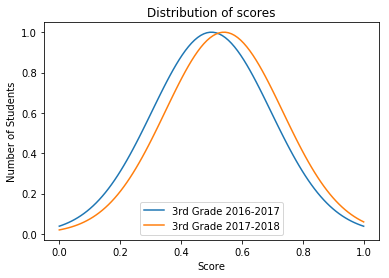

In [15]:
import math
plt.plot(x,gaus(x,1.0, mu3_2016_2017, math.sqrt(var3_2016_2017) ), label="3rd Grade 2016-2017")
plt.plot(x,gaus(x,1.0, mu3_2017_2018, math.sqrt(var3_2017_2018) ), label="3rd Grade 2017-2018")
plt.legend()
plt.title('Distribution of scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.show()

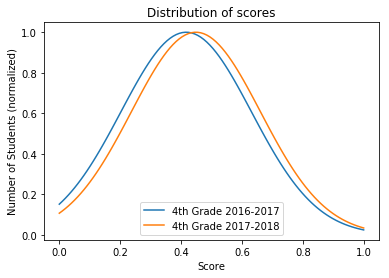

In [16]:
plt.plot(x,gaus(x,1.0, mu4_2016_2017, math.sqrt(var4_2016_2017) ), label="4th Grade 2016-2017")
plt.plot(x,gaus(x,1.0, mu4_2017_2018, math.sqrt(var4_2017_2018) ), label="4th Grade 2017-2018")
plt.legend()
plt.title('Distribution of scores')
plt.xlabel('Score')
plt.ylabel('Number of Students (normalized)')

plt.show()

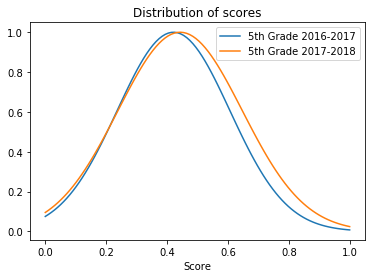

In [17]:
plt.plot(x,gaus(x,1.0, mu5_2016_2017, math.sqrt(var5_2016_2017) ), label="5th Grade 2016-2017")
plt.plot(x,gaus(x,1.0, mu5_2017_2018, math.sqrt(var5_2017_2018) ), label="5th Grade 2017-2018")
plt.legend()
plt.title('Distribution of scores')
plt.xlabel('Score')

plt.show()

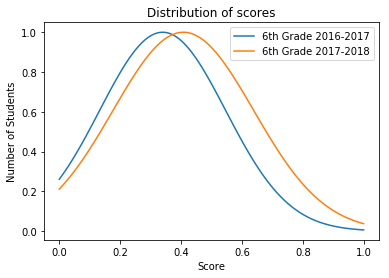

In [18]:
plt.plot(x,gaus(x,1.0, mu6_2016_2017, math.sqrt(var6_2016_2017)), label="6th Grade 2016-2017")
plt.plot(x,gaus(x,1.0, mu6_2017_2018, math.sqrt(var6_2017_2018)), label="6th Grade 2017-2018")
plt.legend()
plt.title('Distribution of scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.show()

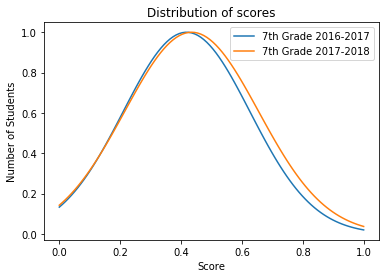

In [19]:
plt.plot(x,gaus(x,1.0, mu7_2016_2017, math.sqrt(var7_2016_2017) ), label="7th Grade 2016-2017")
plt.plot(x,gaus(x,1.0, mu7_2017_2018, math.sqrt(var7_2017_2018) ), label="7th Grade 2017-2018")
plt.legend()
plt.title('Distribution of scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.show()

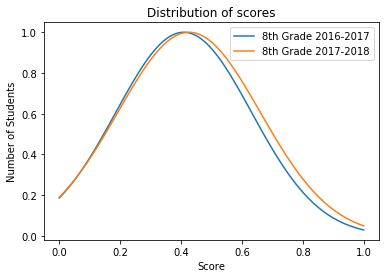

In [22]:
plt.plot(x,gaus(x,1.0, mu8_2016_2017, math.sqrt(var8_2016_2017) ), label="8th Grade 2016-2017")
plt.plot(x,gaus(x,1.0, mu8_2017_2018, math.sqrt(var8_2017_2018) ), label="8th Grade 2017-2018")
plt.legend()
plt.title('Distribution of scores')
plt.xlabel('Score')
plt.ylabel('Number of Students')

plt.show()

From the numbers and graphs, it appears that the sixth grade had the gradest inprovement in scores from 2016-2017 to 2017-2018 school years.

### Sixth Grade Null Hypothisis Test (p-value from t-test)

In [24]:
sixthGradeMath2016_12017 = dfK8Math2016_12017.loc[dfK8Math2016_12017['Student_Grade_Level'] == '06']
sixthGradeMath2017_12018 = dfK8Math2017_12018.loc[dfK8Math2017_12018['Student_Grade_Level'] == '06']

In [25]:
stats.ttest_ind(sixthGradeMath2016_12017['PercentScore'], sixthGradeMath2017_12018['PercentScore'])

Ttest_indResult(statistic=-7.512300271599941, pvalue=8.1889160266379e-14)

With p-value of 8.18e-14 << .05 suggest an alternative hypothisis to the null hypothisis is called for. That is 
the change in mean score is due to a random variation but some real world factor has driven the scores upward.

### Seventh Grade Null Hypothisis Test (p-value from t-test) 

In [26]:
seventhGradeMath2016_12017 = dfK8Math2016_12017.loc[dfK8Math2016_12017['Student_Grade_Level'] == '07']
seventhGradeMath2017_12018 = dfK8Math2017_12018.loc[dfK8Math2017_12018['Student_Grade_Level'] == '07']
stats.ttest_ind(seventhGradeMath2016_12017['PercentScore'], seventhGradeMath2017_12018['PercentScore'])

Ttest_indResult(statistic=-1.7630925889223654, pvalue=0.07803204757223828)

With a p-value of 0.07 > 0.05 suggests we cannot discount the Null hypothisis. The difference of mean may be due to random selection in students participating in the ICA math test.